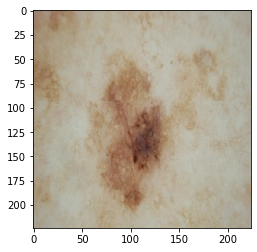

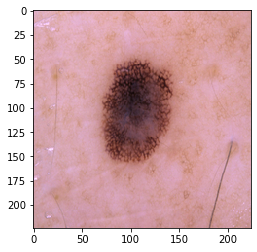

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import glob
import pickle
import random

TRAINDIR = os.getcwd() + "/data/train"
TESTDIR = os.getcwd() + "/data/test"
CATEGORIES = ["malignant", "benign"]
IMG_SIZE = 224
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in glob.glob(path+'/*.*'):
        img_array = cv2.imread(img)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    
  

In [15]:
training_data = []
test_data=[]
def create_training_data(datadir, arr):
    for category in CATEGORIES:
        path = os.path.join(datadir,category)
        class_num = CATEGORIES.index(category)
        for img in glob.glob(path+'/*.*'):
            img_array = cv2.imread(img)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            arr.append([new_array, class_num])
            

create_training_data(TRAINDIR,training_data)
create_training_data(TESTDIR,test_data)
            

In [16]:
print(len(training_data))
print(len(test_data))

2637
660


In [17]:
random.shuffle(training_data)
random.shuffle(test_data)

In [21]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [19]:
X_train = []
y_train = []
X_val = []
y_val = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
for features,label in test_data:
    X_val.append(features)
    y_val.append(label)
    
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 3)



In [20]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_val.pickle", "wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle", "wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()